In [5]:
#Data Processing and EDA 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

#Models 
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

#Metrics 
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score  
from sklearn.metrics import precision_score, recall_score


### Reading the Data

In [7]:
train_df = pd.read_csv('./data/processed/g2/credit_default_train.csv', low_memory=False)
test_df  = pd.read_csv('./data/processed/g2/credit_default_test.csv', low_memory=False)

Data Exploration

In [8]:
train_df.dtypes

cust_id                         int64
LIMIT_BAL                     float64
SEX                           float64
EDUCATION                     float64
MARRIAGE                      float64
AGE                           float64
PAY_0                         float64
PAY_2                         float64
PAY_3                         float64
PAY_4                         float64
PAY_5                         float64
PAY_6                         float64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [9]:
train_df.head()

,cust_id,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,18895,70000.0,1.0,3.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,53972.0,23149.0,23968.0,25559.0,26134.0,26715.0,1700.0,1500.0,2000.0,1000.0,1000.0,2000.0,0
1,25102,390000.0,2.0,2.0,2.0,26.0,2.0,2.0,2.0,0.0,0.0,0.0,185111.0,172865.0,153795.0,140387.0,128112.0,115514.0,5000.0,3000.0,5000.0,4548.0,4100.0,3300.0,0
2,28867,60000.0,1.0,1.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,2.0,21387.0,22416.0,23444.0,26038.0,28607.0,27997.0,1378.0,1406.0,3000.0,3000.0,0.0,923.0,1
3,1842,140000.0,2.0,2.0,1.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,108038.0,110216.0,84516.0,72391.0,61298.0,62193.0,4200.0,2822.0,2336.0,2588.0,2250.0,2491.0,0
4,3371,50000.0,1.0,1.0,2.0,29.0,2.0,2.0,2.0,0.0,0.0,-2.0,7881.0,10415.0,3997.0,1047.0,0.0,0.0,3000.0,0.0,1000.0,0.0,0.0,0.0,1


In [10]:
#checking unique values in the SEX, EDUCATION and AGE 
print("unique values in SEX :" + str(train_df['SEX'].unique()))
print("unique values in AGE :" + str(train_df['AGE'].unique()))
print("unique values in EDUCATION :" + str(train_df['EDUCATION'].unique()))

unique values in SEX :[ 1.  2. nan]
unique values in AGE :[34. 26. 27. 55. 29. 37. 44. 30. 36. 35. 41. 32. 24. 42. 47. 38. 52. 48.
 51. 40. 54. 28. nan 45. 58. 23. 50. 39. 25. 43. 22. 33. 31. 46. 62. 56.
 53. 21. 57. 49. 61. 59. 66. 64. 65. 70. 60. 73. 68. 75. 63. 71. 69. 67.
 74. 72.]
unique values in EDUCATION :[ 3.  2.  1. nan  5.  4.  6.  0.]


In [11]:
train_df.isnull().sum()

cust_id                         0
LIMIT_BAL                     202
SEX                           161
EDUCATION                     199
MARRIAGE                      170
AGE                           214
PAY_0                         195
PAY_2                         219
PAY_3                         217
PAY_4                         199
PAY_5                         185
PAY_6                         203
BILL_AMT1                     185
BILL_AMT2                     209
BILL_AMT3                     175
BILL_AMT4                     165
BILL_AMT5                     181
BILL_AMT6                     197
PAY_AMT1                      204
PAY_AMT2                      184
PAY_AMT3                      212
PAY_AMT4                      197
PAY_AMT5                      179
PAY_AMT6                      196
default.payment.next.month      0
dtype: int64

# EDA

([<matplotlib.axis.XTick at 0x2259e69e490>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

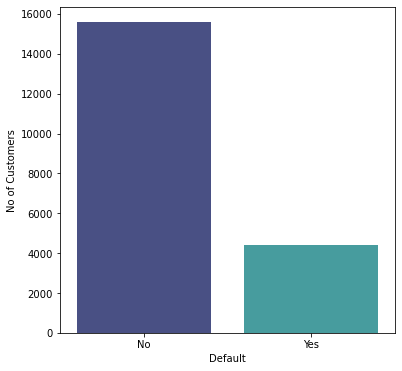

In [12]:
#Subscribers Count
plt.figure(figsize=(6,6))

ax = sns.countplot(x="default.payment.next.month", data=train_df, palette="mako")

plt.xlabel("Default", fontsize=10)
plt.ylabel("No of Customers", fontsize= 10)
plt.xticks([0,1], ['No', 'Yes'], fontsize = 10)

In [70]:
train_df['default.payment.next.month'].sum()/train_df.shape[0]

0.2207

AGE DISTRIBUTION
- maximum customers are in the range of 20-50

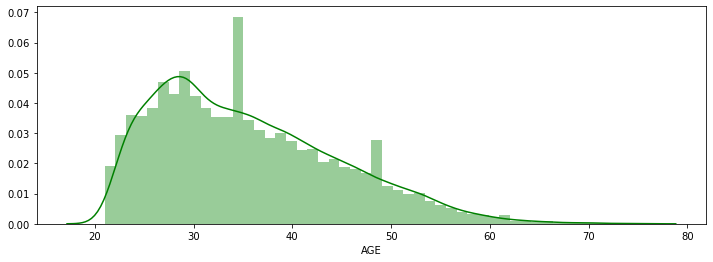

In [13]:
#AGE DISTRIBUTION
plt.figure(figsize=(12,4))

sns.distplot(train_df['AGE'], color= 'g')
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('')
plt.show()

Checking correlation Among the Features

<AxesSubplot:>

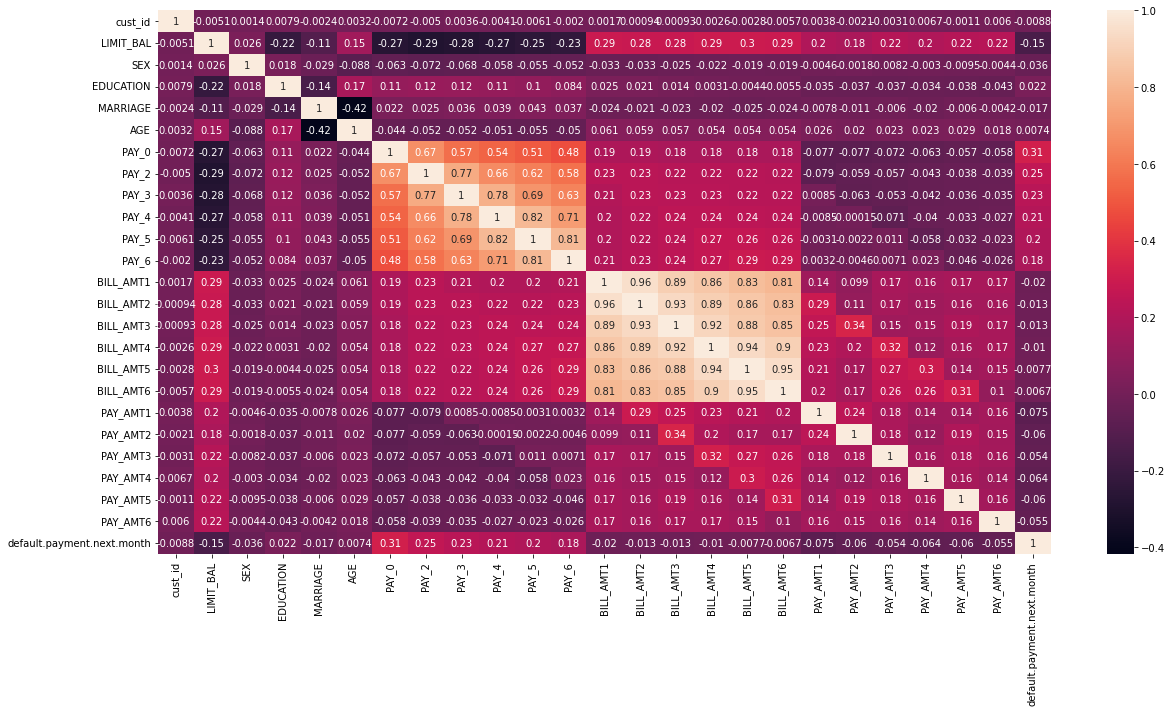

In [355]:
# correlation
plt.figure(figsize=(20,10))
sns.heatmap(train_df.corr(method='pearson'),annot=True)

In [14]:
#Categorical Variables 

cat_vars = train_df[['SEX', 'EDUCATION','MARRIAGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

Correlation for Categorical Variables
- Payments variables are highly Correlated with each other

<AxesSubplot:>

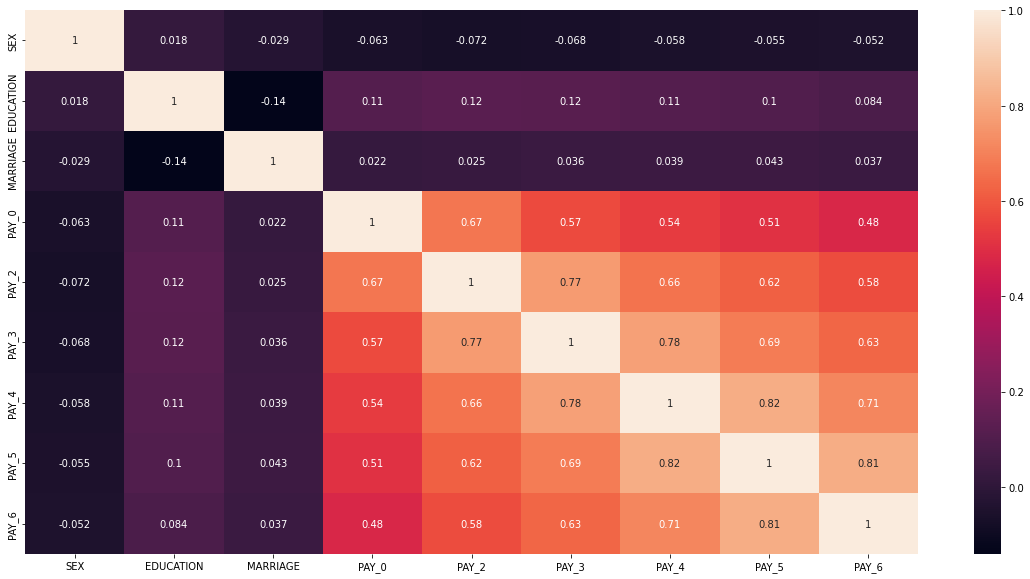

In [357]:
# correlation Cat variables
plt.figure(figsize=(20,10))
sns.heatmap(cat_vars.corr(method='pearson'),annot=True)

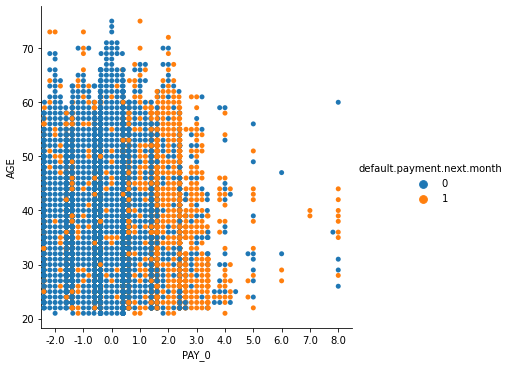

In [17]:
sns.catplot(data=train_df, kind="swarm", x="PAY_0", y="AGE", hue="default.payment.next.month")

Age does not look associated with payment status, but payment status is correlated with deault.

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

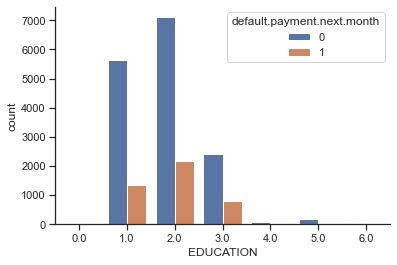

In [38]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.countplot(data=train_df, x="EDUCATION", hue="default.payment.next.month")

FIRST TRYING TO LOOK AT THE PERFORMANCE BY IMPUTING NULL VALUES WITH 0
- with out preprocessing and Feature Selection

In [39]:
train_df.isna().sum()

cust_id                         0
LIMIT_BAL                     202
SEX                           161
EDUCATION                     199
MARRIAGE                      170
AGE                           214
PAY_0                         195
PAY_2                         219
PAY_3                         217
PAY_4                         199
PAY_5                         185
PAY_6                         203
BILL_AMT1                     185
BILL_AMT2                     209
BILL_AMT3                     175
BILL_AMT4                     165
BILL_AMT5                     181
BILL_AMT6                     197
PAY_AMT1                      204
PAY_AMT2                      184
PAY_AMT3                      212
PAY_AMT4                      197
PAY_AMT5                      179
PAY_AMT6                      196
default.payment.next.month      0
dtype: int64

In [40]:
test_df.isna().sum()

cust_id        0
LIMIT_BAL    105
SEX          111
EDUCATION     95
MARRIAGE      97
AGE          124
PAY_0        103
PAY_2        109
PAY_3         87
PAY_4        120
PAY_5        106
PAY_6         88
BILL_AMT1    100
BILL_AMT2    105
BILL_AMT3    105
BILL_AMT4    105
BILL_AMT5    101
BILL_AMT6    104
PAY_AMT1      88
PAY_AMT2     122
PAY_AMT3      87
PAY_AMT4     109
PAY_AMT5      95
PAY_AMT6      93
dtype: int64

In [41]:
#Filling NAs with 0
train_df = train_df.fillna(0)
test_df  = test_df.fillna(0)

In [42]:
X = train_df.iloc[:,:-1].values
y = train_df.iloc[:,-1].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [43]:
logistic = LogisticRegression()
neural_net = MLPClassifier()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

In [44]:
models = {
    "LOGISTIC"      : logistic,
    "NEURAL_NET"    : neural_net,
    "DECISION_TREE" : decision_tree,
    "RANDOM_FOREST" : random_forest
}

In [45]:
#fitting the models
for model in models:
    models[model].fit(X_train,y_train)
    print(f"{model}      has been trained successfully")

LOGISTIC      has been trained successfully
NEURAL_NET      has been trained successfully
DECISION_TREE      has been trained successfully
RANDOM_FOREST      has been trained successfully


- Decision Tree and Random Forest are Overfitting
- Random Forest gives the Best Test Accuracy 

In [46]:
#TRAIN Performance
performances_training_acc = {}
performances_training_auc = {}

for model in models:
    train_predictions   = models[model].predict(X_train)
    probabilities = pd.DataFrame(models[model].predict_proba(X_train))[1]
    accuracy      = accuracy_score(y_train,train_predictions)
    auc           = roc_auc_score(np.array(y_train),np.array(probabilities),multi_class = 'ovr')
    
    performances_training_acc[model] = {"Train Accuracy":accuracy}
    performances_training_auc[model] = {"Train Auc":auc}
#TEST ACCURACY and AUC
train_acc = pd.DataFrame(performances_training_acc)
train_auc = pd.DataFrame(performances_training_auc)



#TEST Performance
performances_test_acc = {}
performances_test_auc = {}

for model in models:
    test_predictions   = models[model].predict(X_test)
    probabilities      = pd.DataFrame(models[model].predict_proba(X_test))[1]
    accuracy           = accuracy_score(y_test,test_predictions)
    auc                = roc_auc_score(np.array(y_test),np.array(probabilities),multi_class = 'ovr')
    performances_test_acc[model] = {"Test Accuracy":accuracy}
    performances_test_auc[model] = {"Test Auc":auc}
#TEST ACCURACY and AUC
test_acc = pd.DataFrame(performances_test_acc)
test_auc = pd.DataFrame(performances_test_auc)

Accuracy = pd.concat([train_acc, test_acc])
AUC      = pd.concat([train_auc, test_auc])
metrics  = pd.concat([Accuracy ,AUC ])
metrics

,LOGISTIC,NEURAL_NET,DECISION_TREE,RANDOM_FOREST
Train Accuracy,0.779143,0.759214,1.000000,0.999929
Test Accuracy,0.779500,0.749500,0.727333,0.814333
Train Auc,0.644924,0.680265,1.000000,1.000000
Test Auc,0.643100,0.647549,0.614517,0.744043


# TREE BASED MODELS 

In [47]:
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
xgb           = XGBClassifier()
gb            = GradientBoostingClassifier()
lgbm          = LGBMClassifier()
cat_boost     = CatBoostClassifier()

In [48]:
models = {
    "DECISION_TREE" : decision_tree, 
    "RANDOM_FOREST" : random_forest,
    "GB"            : gb,
    "XGB"           : xgb,
    "LGBM"          : lgbm,
    "CAT_BOOST"     : cat_boost
}

In [49]:
#fitting the models
for model in models:
    models[model].fit(X_train,y_train)
    print(f"{model}      has been trained successfully")

DECISION_TREE      has been trained successfully
RANDOM_FOREST      has been trained successfully
GB      has been trained successfully
[16:21:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB      has been trained successfully
LGBM      has been trained successfully
Learning rate set to 0.031793
0:	learn: 0.6753109	total: 164ms	remaining: 2m 43s
1:	learn: 0.6596150	total: 172ms	remaining: 1m 25s
2:	learn: 0.6440971	total: 178ms	remaining: 59.3s
3:	learn: 0.6293810	total: 186ms	remaining: 46.4s
4:	learn: 0.6161206	total: 195ms	remaining: 38.8s
5:	learn: 0.6038472	total: 202ms	remaining: 33.5s
6:	learn: 0.5925853	total: 210ms	remaining: 29.7s
7:	learn: 0.5820959	total: 217ms	remaining: 26.9s
8:	learn: 0.5722754	total: 224ms	remaining:

152:	learn: 0.4132147	total: 1.44s	remaining: 7.97s
153:	learn: 0.4130795	total: 1.45s	remaining: 7.95s
154:	learn: 0.4129844	total: 1.46s	remaining: 7.95s
155:	learn: 0.4128124	total: 1.47s	remaining: 7.93s
156:	learn: 0.4127185	total: 1.47s	remaining: 7.91s
157:	learn: 0.4126209	total: 1.48s	remaining: 7.89s
158:	learn: 0.4125411	total: 1.49s	remaining: 7.87s
159:	learn: 0.4124158	total: 1.49s	remaining: 7.84s
160:	learn: 0.4122557	total: 1.5s	remaining: 7.83s
161:	learn: 0.4122099	total: 1.51s	remaining: 7.81s
162:	learn: 0.4120410	total: 1.53s	remaining: 7.84s
163:	learn: 0.4119463	total: 1.54s	remaining: 7.88s
164:	learn: 0.4118048	total: 1.56s	remaining: 7.91s
165:	learn: 0.4116474	total: 1.58s	remaining: 7.94s
166:	learn: 0.4115067	total: 1.59s	remaining: 7.95s
167:	learn: 0.4114503	total: 1.62s	remaining: 8.01s
168:	learn: 0.4112111	total: 1.64s	remaining: 8.04s
169:	learn: 0.4110529	total: 1.65s	remaining: 8.07s
170:	learn: 0.4108661	total: 1.66s	remaining: 8.07s
171:	learn: 0

321:	learn: 0.3928700	total: 3s	remaining: 6.31s
322:	learn: 0.3927857	total: 3s	remaining: 6.3s
323:	learn: 0.3926303	total: 3.01s	remaining: 6.29s
324:	learn: 0.3924862	total: 3.02s	remaining: 6.28s
325:	learn: 0.3924123	total: 3.03s	remaining: 6.26s
326:	learn: 0.3922881	total: 3.04s	remaining: 6.25s
327:	learn: 0.3921763	total: 3.04s	remaining: 6.24s
328:	learn: 0.3920752	total: 3.05s	remaining: 6.22s
329:	learn: 0.3919643	total: 3.08s	remaining: 6.24s
330:	learn: 0.3918731	total: 3.08s	remaining: 6.23s
331:	learn: 0.3917325	total: 3.09s	remaining: 6.22s
332:	learn: 0.3916024	total: 3.1s	remaining: 6.21s
333:	learn: 0.3914744	total: 3.11s	remaining: 6.2s
334:	learn: 0.3913083	total: 3.12s	remaining: 6.19s
335:	learn: 0.3912477	total: 3.13s	remaining: 6.18s
336:	learn: 0.3911364	total: 3.14s	remaining: 6.17s
337:	learn: 0.3910629	total: 3.15s	remaining: 6.16s
338:	learn: 0.3909243	total: 3.15s	remaining: 6.15s
339:	learn: 0.3908093	total: 3.16s	remaining: 6.14s
340:	learn: 0.3907360

480:	learn: 0.3733884	total: 4.3s	remaining: 4.63s
481:	learn: 0.3732466	total: 4.3s	remaining: 4.62s
482:	learn: 0.3730757	total: 4.31s	remaining: 4.62s
483:	learn: 0.3729240	total: 4.32s	remaining: 4.61s
484:	learn: 0.3727728	total: 4.33s	remaining: 4.59s
485:	learn: 0.3726704	total: 4.33s	remaining: 4.58s
486:	learn: 0.3725634	total: 4.34s	remaining: 4.57s
487:	learn: 0.3724784	total: 4.35s	remaining: 4.56s
488:	learn: 0.3723508	total: 4.36s	remaining: 4.55s
489:	learn: 0.3722603	total: 4.36s	remaining: 4.54s
490:	learn: 0.3721377	total: 4.37s	remaining: 4.53s
491:	learn: 0.3720652	total: 4.38s	remaining: 4.52s
492:	learn: 0.3719254	total: 4.38s	remaining: 4.51s
493:	learn: 0.3717902	total: 4.39s	remaining: 4.5s
494:	learn: 0.3716174	total: 4.4s	remaining: 4.49s
495:	learn: 0.3715174	total: 4.4s	remaining: 4.47s
496:	learn: 0.3714759	total: 4.41s	remaining: 4.46s
497:	learn: 0.3713357	total: 4.42s	remaining: 4.45s
498:	learn: 0.3711947	total: 4.43s	remaining: 4.44s
499:	learn: 0.370

642:	learn: 0.3551963	total: 5.58s	remaining: 3.1s
643:	learn: 0.3550558	total: 5.59s	remaining: 3.09s
644:	learn: 0.3549461	total: 5.6s	remaining: 3.08s
645:	learn: 0.3548166	total: 5.61s	remaining: 3.07s
646:	learn: 0.3547102	total: 5.62s	remaining: 3.06s
647:	learn: 0.3546517	total: 5.63s	remaining: 3.06s
648:	learn: 0.3545907	total: 5.63s	remaining: 3.04s
649:	learn: 0.3544660	total: 5.64s	remaining: 3.04s
650:	learn: 0.3543880	total: 5.65s	remaining: 3.03s
651:	learn: 0.3543077	total: 5.65s	remaining: 3.02s
652:	learn: 0.3542393	total: 5.66s	remaining: 3.01s
653:	learn: 0.3541339	total: 5.67s	remaining: 3s
654:	learn: 0.3539273	total: 5.68s	remaining: 2.99s
655:	learn: 0.3538079	total: 5.68s	remaining: 2.98s
656:	learn: 0.3536474	total: 5.69s	remaining: 2.97s
657:	learn: 0.3535422	total: 5.7s	remaining: 2.96s
658:	learn: 0.3534665	total: 5.71s	remaining: 2.96s
659:	learn: 0.3533302	total: 5.72s	remaining: 2.95s
660:	learn: 0.3532717	total: 5.73s	remaining: 2.94s
661:	learn: 0.3530

826:	learn: 0.3368349	total: 7.09s	remaining: 1.48s
827:	learn: 0.3367452	total: 7.09s	remaining: 1.47s
828:	learn: 0.3366549	total: 7.1s	remaining: 1.46s
829:	learn: 0.3364807	total: 7.11s	remaining: 1.46s
830:	learn: 0.3364134	total: 7.12s	remaining: 1.45s
831:	learn: 0.3362749	total: 7.12s	remaining: 1.44s
832:	learn: 0.3361987	total: 7.13s	remaining: 1.43s
833:	learn: 0.3360622	total: 7.14s	remaining: 1.42s
834:	learn: 0.3358939	total: 7.15s	remaining: 1.41s
835:	learn: 0.3357085	total: 7.16s	remaining: 1.4s
836:	learn: 0.3355791	total: 7.17s	remaining: 1.4s
837:	learn: 0.3355276	total: 7.17s	remaining: 1.39s
838:	learn: 0.3354059	total: 7.18s	remaining: 1.38s
839:	learn: 0.3353700	total: 7.19s	remaining: 1.37s
840:	learn: 0.3353353	total: 7.2s	remaining: 1.36s
841:	learn: 0.3352841	total: 7.2s	remaining: 1.35s
842:	learn: 0.3352153	total: 7.21s	remaining: 1.34s
843:	learn: 0.3351495	total: 7.22s	remaining: 1.33s
844:	learn: 0.3350846	total: 7.22s	remaining: 1.32s
845:	learn: 0.335

In [50]:
#TRAIN Performance
performances_training_acc = {}
performances_training_auc = {}

for model in models:
    train_predictions   = models[model].predict(X_train)
    probabilities = pd.DataFrame(models[model].predict_proba(X_train))[1]
    accuracy      = accuracy_score(y_train,train_predictions)
    auc           = roc_auc_score(np.array(y_train),np.array(probabilities),multi_class = 'ovr')
    
    performances_training_acc[model] = {"Train Accuracy":accuracy}
    performances_training_auc[model] = {"Train Auc":auc}
#TEST ACCURACY and AUC
train_acc = pd.DataFrame(performances_training_acc)
train_auc = pd.DataFrame(performances_training_auc)



#TEST Performance
performances_test_acc = {}
performances_test_auc = {}

for model in models:
    test_predictions   = models[model].predict(X_test)
    probabilities      = pd.DataFrame(models[model].predict_proba(X_test))[1]
    accuracy           = accuracy_score(y_test,test_predictions)
    auc                = roc_auc_score(np.array(y_test),np.array(probabilities),multi_class = 'ovr')
    performances_test_acc[model] = {"Test Accuracy":accuracy}
    performances_test_auc[model] = {"Test Auc":auc}
#TEST ACCURACY and AUC
test_acc = pd.DataFrame(performances_test_acc)
test_auc = pd.DataFrame(performances_test_auc)

Accuracy = pd.concat([train_acc, test_acc])
AUC      = pd.concat([train_auc, test_auc])
metrics  = pd.concat([Accuracy ,AUC ])
metrics

,DECISION_TREE,RANDOM_FOREST,GB,XGB,LGBM,CAT_BOOST
Train Accuracy,1.000000,1.000000,0.825357,0.918571,0.860643,0.865786
Test Accuracy,0.726833,0.815000,0.821667,0.808500,0.813167,0.818667
Train Auc,1.000000,1.000000,0.816136,0.974415,0.914839,0.912650
Test Auc,0.615009,0.744555,0.762325,0.735523,0.754716,0.758674


#### Grid search with neural network

Reference: https://www.geeksforgeeks.org/hyperparameter-tuning-using-gridsearchcv-and-kerasclassifier/

In [64]:
# import the libraries 

import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from keras import metrics
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from sklearn.model_selection import KFold, StratifiedKFold, cross_validate, GridSearchCV


In [59]:
X = train_df.iloc[:,:-1]
X = X.iloc[:,1:]

In [65]:
#build classifier function

def build_clf(unit,optimizer='adam',activation='relu'):
  # creating the layers of the NN
  ann = tf.keras.models.Sequential()
  ann.add(tf.keras.layers.Dense(units=unit, activation=activation))
  ann.add(Dropout(0.1))
  ann.add(tf.keras.layers.Dense(units=unit, activation=activation))
  ann.add(Dropout(0.1))
  ann.add(tf.keras.layers.Dense(units=unit, activation=activation))
  ann.add(tf.keras.layers.Dense(units=1, activation=activation))
  ann.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
  return ann

In [66]:
#create model
nn_model=KerasClassifier(build_fn=build_clf)

In [67]:
%%time

#grid search 

params={'optimizer' : ['adam','rmsprop','sgd'],
        'activation' : ['relu','sigmoid','tanh'],
        'batch_size':[100, 20, 50, 25, 32], 
        'nb_epoch':[200, 100, 300, 400],
        'unit':np.arange(10, 26)}

clf=GridSearchCV(estimator=nn_model, param_grid=params,  n_jobs=-1, scoring="roc_auc",return_train_score=True)

# now fit the dataset to the GridSearchCV object. 
clf.fit(X, y)

print("Best Estimator:  ",clf.best_estimator_)
print("Best Parameters: ",clf.best_params_)
print("Best Score:      ",clf.best_score_)

800/800 [==============================] - 2s 1ms/step - loss: 0.5261 - accuracy: 0.7793
Best Estimator:   <keras.wrappers.scikit_learn.KerasClassifier object at 0x00000225AE0C1520>
Best Parameters:  {'activation': 'sigmoid', 'batch_size': 25, 'nb_epoch': 100, 'optimizer': 'rmsprop', 'unit': 21}
Best Score:       0.5848040399109916
Wall time: 2h 27min 18s


In [68]:
pd.DataFrame(clf.cv_results_).to_csv("cv_results_keras.csv")

# DATA PROCESSING 

In [370]:
#Reading the data again
train_df = pd.read_csv("credit_default_train.csv")
test_df  = pd.read_csv("credit_default_test.csv")

In [371]:
train_df.head()

,cust_id,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,18895,70000.0,1.0,3.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,53972.0,23149.0,23968.0,25559.0,26134.0,26715.0,1700.0,1500.0,2000.0,1000.0,1000.0,2000.0,0
1,25102,390000.0,2.0,2.0,2.0,26.0,2.0,2.0,2.0,0.0,0.0,0.0,185111.0,172865.0,153795.0,140387.0,128112.0,115514.0,5000.0,3000.0,5000.0,4548.0,4100.0,3300.0,0
2,28867,60000.0,1.0,1.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,2.0,21387.0,22416.0,23444.0,26038.0,28607.0,27997.0,1378.0,1406.0,3000.0,3000.0,0.0,923.0,1
3,1842,140000.0,2.0,2.0,1.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,108038.0,110216.0,84516.0,72391.0,61298.0,62193.0,4200.0,2822.0,2336.0,2588.0,2250.0,2491.0,0
4,3371,50000.0,1.0,1.0,2.0,29.0,2.0,2.0,2.0,0.0,0.0,-2.0,7881.0,10415.0,3997.0,1047.0,0.0,0.0,3000.0,0.0,1000.0,0.0,0.0,0.0,1


#### Creating list of Numerical and Cat Variables

In [372]:
# General list of variables
id_var = ["cust_id"]  # ID
target_var = ["default.payment.next.month"]  # Target get variable
predictors = [v for v in train_df.columns if v not in id_var + target_var]

# List of numerical and catergorical variables
num_vars = ['LIMIT_BAL', 'AGE',
            'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
cat_vars = ['SEX', 'EDUCATION', 'MARRIAGE',
            'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

#### Check and correct data error - Constant variables

In [373]:
# Count number of unique values of each variable
vars_nunique = train_df[num_vars + cat_vars].apply(pd.Series.nunique, dropna=False, axis=0)
cont_vars = vars_nunique.index[vars_nunique < 2].tolist()
print("Drop constant variable:", cont_vars)

# Correct variable list
num_vars = [v for v in num_vars if v not in cont_vars]
cat_vars = [v for v in cat_vars if v not in cont_vars]

# Update train, test
train_df = train_df[id_var + num_vars + cat_vars + target_var]
test_df = test_df[id_var + num_vars + cat_vars]

Drop constant variable: []


In [374]:
# Check missing values in train and test data 
print('Train - NA of num vars:', train_df[num_vars].isna().sum().sum())
print('Train - NA of cat vars:', train_df[cat_vars].isna().sum().sum())
print('Test  - NA of num vars:', test_df[num_vars].isna().sum().sum())
print('Test  - NA of cat vars:', test_df[cat_vars].isna().sum().sum())

Train - NA of num vars: 2700
Train - NA of cat vars: 1748
Test  - NA of num vars: 1443
Test  - NA of cat vars: 916


In [375]:
#Dropping variables with high missing percentage (>30%)
na_threshold = 0.3

# Drop num variables with more than 30% missing values
num_na_pct = train_df[num_vars].isnull().mean()
num_vars = num_na_pct[num_na_pct <= na_threshold].index.tolist()
print("Drop num variables with high missing pct:", num_na_pct[num_na_pct > na_threshold].tolist())

# Drop cat variables with more than 30% missing values
cat_na_pct = train_df[cat_vars].isnull().mean()
cat_vars = cat_na_pct[cat_na_pct <= 0.3].index.tolist()
print("Drop cat variables with high missing pct:", cat_na_pct[cat_na_pct > na_threshold].tolist())

# Update train, test
train_df = train_df[id_var + num_vars + cat_vars + target_var]
test_df = test_df[id_var + num_vars + cat_vars]

Drop num variables with high missing pct: []
Drop cat variables with high missing pct: []


In [376]:
# List dummary variables to track missing values imputation
na_vars = []

In [377]:
num_vars

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

IMPUTING NUMERICAL COLUMNS 

In [378]:
# Numerical variables
# Build the missing value imputor using the mean
imp = SimpleImputer(missing_values=np.nan, strategy='mean', add_indicator=True)
imp.fit(train_df[num_vars])

# Reconstruct the list of vars + indicators
na_vars = na_vars + [num_vars[v] + "_na" for v in imp.indicator_.features_]
impute_vars = num_vars + na_vars

# Apply on train, test
train_df[impute_vars] = pd.DataFrame(imp.transform(train_df[num_vars]), columns=impute_vars)
test_df[impute_vars] = pd.DataFrame(imp.transform(test_df[num_vars]), columns=impute_vars)

IMPUTING CAT COLUMNS

In [379]:
#Imputing Categorical Columns as Missing 
train_df[cat_vars] = train_df[cat_vars].fillna('Missing')
test_df[cat_vars] = test_df[cat_vars].fillna('Missing')

ENCODING CAT VARIABLES 

In [380]:
# Encode categorical variables as integer values
enc = OrdinalEncoder()
enc.fit(pd.concat([train_df[cat_vars].astype(str), test_df[cat_vars].astype(str)], axis=0))
# Apply on train, test
train_df[cat_vars] = enc.transform(train_df[cat_vars].astype(str))
test_df[cat_vars] = enc.transform(test_df[cat_vars].astype(str))

In [381]:
# Convert bool variable to int
train_df[na_vars] = train_df[na_vars].astype(np.int8)
test_df[na_vars] = test_df[na_vars].astype(np.int8)

Checking variables after Processing

In [382]:
# Print out the final variables
print("# id_var [", len(id_var), "] :", id_var)
print("# num_vars [", len(num_vars), "] :", num_vars[:5], "...")
print("# cat_vars [", len(cat_vars), "] :", cat_vars[:5], "...")
print("# na_vars [", len(na_vars), "] :", na_vars[:5], "...")
print("# target_var [", len(target_var), "] :", target_var)

# id_var [ 1 ] : ['cust_id']
# num_vars [ 14 ] : ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3'] ...
# cat_vars [ 9 ] : ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2'] ...
# na_vars [ 14 ] : ['LIMIT_BAL_na', 'AGE_na', 'BILL_AMT1_na', 'BILL_AMT2_na', 'BILL_AMT3_na'] ...
# target_var [ 1 ] : ['default.payment.next.month']


In [383]:
# Sort the data according to the variables list
train_df = train_df[id_var + num_vars + cat_vars + na_vars + target_var]
test_df = test_df[id_var + num_vars + cat_vars + na_vars]
print(train_df.shape)
print(test_df.shape)

(20000, 39)
(10000, 38)


In [384]:
train_df

,cust_id,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,LIMIT_BAL_na,AGE_na,BILL_AMT1_na,BILL_AMT2_na,BILL_AMT3_na,BILL_AMT4_na,BILL_AMT5_na,BILL_AMT6_na,PAY_AMT1_na,PAY_AMT2_na,PAY_AMT3_na,PAY_AMT4_na,PAY_AMT5_na,PAY_AMT6_na,default.payment.next.month
0,18895,70000.0,34.0,53972.0,23149.0,23968.0,25559.0,26134.0,26715.0,1700.0,1500.0,2000.000000,1000.0,1000.0,2000.0,0.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,25102,390000.0,26.0,185111.0,172865.0,153795.0,140387.0,128112.0,115514.0,5000.0,3000.0,5000.000000,4548.0,4100.0,3300.0,1.0,2.0,2.0,4.0,4.0,4.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,28867,60000.0,27.0,21387.0,22416.0,23444.0,26038.0,28607.0,27997.0,1378.0,1406.0,3000.000000,3000.0,0.0,923.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1842,140000.0,55.0,108038.0,110216.0,84516.0,72391.0,61298.0,62193.0,4200.0,2822.0,2336.000000,2588.0,2250.0,2491.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3371,50000.0,29.0,7881.0,10415.0,3997.0,1047.0,0.0,0.0,3000.0,0.0,1000.000000,0.0,0.0,0.0,0.0,1.0,2.0,4.0,4.0,4.0,2.0,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5994,500000.0,36.0,226.0,8546.0,121867.0,116089.0,114293.0,118081.0,9125.0,126768.0,5208.033808,4050.0,15099.0,5015.0,0.0,2.0,2.0,3.0,1.0,0.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
19996,25043,30000.0,31.0,28275.0,29772.0,27821.0,28075.0,29682.0,28001.0,2000.0,2000.0,2000.000000,2014.0,2000.0,2000.0,0.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19997,14281,20000.0,30.0,19977.0,21359.0,20581.0,19860.0,19690.0,1735.0,2000.0,0.0,0.000000,0.0,500.0,0.0,0.0,2.0,2.0,3.0,4.0,6.0,5.0,3.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
19998,28693,240000.0,67.0,542827.0,508581.0,471796.0,468202.0,442401.0,419209.0,20225.0,17389.0,80167.000000,15167.0,16000.0,13133.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### FEATURE ENGINEERING AND SELECTION

Creating Age groups based on AGE 


In [385]:
print(train_df['AGE'].min())
print(train_df['AGE'].max())

21.0
75.0


In [386]:
print(train_df['AGE'].unique())

[34.         26.         27.         55.         29.         37.
 44.         30.         36.         35.         41.         32.
 24.         42.         47.         38.         52.         48.
 51.         40.         54.         28.         35.47634691 45.
 58.         23.         50.         39.         25.         43.
 22.         33.         31.         46.         62.         56.
 53.         21.         57.         49.         61.         59.
 66.         64.         65.         70.         60.         73.
 68.         75.         63.         71.         69.         67.
 74.         72.        ]


In [387]:
#TRAIN DATA - AGE
train_df['AGE_GRP'] = 'unknown'
#train_df.loc[train_df['AGE']  < 10 ,['age_group']] = '0_10'
#train_df.loc[(train_df['AGE'] > 9) & (train_df['AGE']< 20) ,['AGE_GRP']] = '10'
train_df.loc[(train_df['AGE'] > 19) & (train_df['AGE']< 30) ,['AGE_GRP']] = '20'
train_df.loc[(train_df['AGE'] > 29) & (train_df['AGE']< 40) ,['AGE_GRP']] = '30'
train_df.loc[(train_df['AGE'] > 39) & (train_df['AGE']< 50) ,['AGE_GRP']] = '40'
train_df.loc[(train_df['AGE'] > 49) & (train_df['AGE']< 60) ,['AGE_GRP']] = '50'
train_df.loc[(train_df['AGE'] > 59) & (train_df['AGE']< 70) ,['AGE_GRP']] = '60'
train_df.loc[(train_df['AGE'] > 69) & (train_df['AGE']< 80) ,['AGE_GRP']] = '70'
train_df.loc[(train_df['AGE'] > 79) & (train_df['AGE']< 90) ,['AGE_GRP']] = '80'
train_df.loc[train_df['AGE'] > 89 ,['AGE_GRP']] = '90'

In [388]:
#TEST DATA - AGE
test_df['AGE_GRP'] = 'unknown'
#train_df.loc[train_df['AGE']  < 10 ,['age_group']] = '0_10'
#train_df.loc[(train_df['AGE'] > 9) & (train_df['AGE']< 20) ,['AGE_GRP']] = '10'
test_df.loc[(test_df['AGE'] > 19) & (test_df['AGE']< 30) ,['AGE_GRP']] = '20'
test_df.loc[(test_df['AGE'] > 29) & (test_df['AGE']< 40) ,['AGE_GRP']] = '30'
test_df.loc[(test_df['AGE'] > 39) & (test_df['AGE']< 50) ,['AGE_GRP']] = '40'
test_df.loc[(test_df['AGE'] > 49) & (test_df['AGE']< 60) ,['AGE_GRP']] = '50'
test_df.loc[(test_df['AGE'] > 59) & (test_df['AGE']< 70) ,['AGE_GRP']] = '60'
test_df.loc[(test_df['AGE'] > 69) & (test_df['AGE']< 80) ,['AGE_GRP']] = '70'
test_df.loc[(test_df['AGE'] > 79) & (test_df['AGE']< 90) ,['AGE_GRP']] = '80'
test_df.loc[test_df['AGE'] > 89 ,['AGE_GRP']] = '90'

In [389]:
train_df.head(2)

,cust_id,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,LIMIT_BAL_na,AGE_na,BILL_AMT1_na,BILL_AMT2_na,BILL_AMT3_na,BILL_AMT4_na,BILL_AMT5_na,BILL_AMT6_na,PAY_AMT1_na,PAY_AMT2_na,PAY_AMT3_na,PAY_AMT4_na,PAY_AMT5_na,PAY_AMT6_na,default.payment.next.month,AGE_GRP
0,18895,70000.0,34.0,53972.0,23149.0,23968.0,25559.0,26134.0,26715.0,1700.0,1500.0,2000.0,1000.0,1000.0,2000.0,0.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30
1,25102,390000.0,26.0,185111.0,172865.0,153795.0,140387.0,128112.0,115514.0,5000.0,3000.0,5000.0,4548.0,4100.0,3300.0,1.0,2.0,2.0,4.0,4.0,4.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20


In [390]:
test_df.head(2)

,cust_id,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,LIMIT_BAL_na,AGE_na,BILL_AMT1_na,BILL_AMT2_na,BILL_AMT3_na,BILL_AMT4_na,BILL_AMT5_na,BILL_AMT6_na,PAY_AMT1_na,PAY_AMT2_na,PAY_AMT3_na,PAY_AMT4_na,PAY_AMT5_na,PAY_AMT6_na,AGE_GRP
0,18847,130000.0,33.0,36672.0,35807.0,40851.0,39526.0,41346.0,40630.0,0.0,6000.0,0.0,3000.0,1000.0,1100.0,0.0,1.0,2.0,3.0,4.0,4.0,4.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30
1,26803,50000.0,22.0,49609.0,61162.0,31485.0,15281.0,18031.0,18233.0,2100.0,2000.0,4000.0,3000.0,1500.0,1000.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20


In [391]:
#Dropping Age 
del train_df['AGE']
del test_df['AGE']

In [392]:
# Check mutual information for all variables
mutual_info = mutual_info_classif(train_df[cat_vars], train_df[target_var].values.squeeze())
mutual_info = pd.Series(mutual_info, index=cat_vars)
print("Top 6 vars :"); print(mutual_info.sort_values(ascending=False)[:6])

Top 6 vars :
PAY_0    0.070750
PAY_2    0.049240
PAY_3    0.038396
PAY_5    0.031566
PAY_4    0.030922
PAY_6    0.024919
dtype: float64


- We can see all the Pay features are highly dependent on each other hence creating a new feature by taking the mean of the 6 variables

In [393]:
#Creating PAY feature 
train_df['PAY_MEAN'] = train_df[['PAY_0', 'PAY_2','PAY_3', 'PAY_4','PAY_5', 'PAY_6']].mean(axis=1)
test_df['PAY_MEAN'] = train_df[['PAY_0', 'PAY_2','PAY_3', 'PAY_4','PAY_5', 'PAY_6']].mean(axis=1)

Dropping all the PAY_AMT Features

In [394]:
train_df = train_df.drop(['PAY_0', 'PAY_2','PAY_3', 'PAY_4','PAY_5', 'PAY_6'], axis = 1)
test_df  = test_df.drop(['PAY_0', 'PAY_2','PAY_3', 'PAY_4','PAY_5', 'PAY_6'], axis = 1)

DROPPING DUMMY FEATURES FOR PAY_AMT

In [395]:
# train_df = train_df.drop(['PAY_AMT1_na','PAY_AMT2_na','PAY_AMT3_na','PAY_AMT4_na','PAY_AMT5_na','PAY_AMT6_na'], axis = 1)
# test_df  = test_df.drop(['PAY_AMT1_na','PAY_AMT2_na','PAY_AMT3_na','PAY_AMT4_na','PAY_AMT5_na','PAY_AMT6_na'], axis = 1)

In [396]:
#Deleting AGE_na

del train_df['AGE_na']
del test_df['AGE_na']

ENCODING AGE_GRP

- train_df

In [398]:
# Get one hot encoding of column AGE_GRP
one_hot = pd.get_dummies(train_df.AGE_GRP ,prefix='AGE_GROUP' )
# Drop column AGE_GRP as it is now encoded
train_df = train_df.drop('AGE_GRP',axis = 1)
# Join the encoded df
train_df = train_df.join(one_hot)

In [399]:
train_df

,cust_id,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,LIMIT_BAL_na,BILL_AMT1_na,BILL_AMT2_na,BILL_AMT3_na,BILL_AMT4_na,BILL_AMT5_na,BILL_AMT6_na,PAY_AMT1_na,PAY_AMT2_na,PAY_AMT3_na,PAY_AMT4_na,PAY_AMT5_na,PAY_AMT6_na,default.payment.next.month,PAY_MEAN,AGE_GROUP_20,AGE_GROUP_30,AGE_GROUP_40,AGE_GROUP_50,AGE_GROUP_60,AGE_GROUP_70
0,18895,70000.0,53972.0,23149.0,23968.0,25559.0,26134.0,26715.0,1700.0,1500.0,2000.000000,1000.0,1000.0,2000.0,0.0,3.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,0,1,0,0,0,0
1,25102,390000.0,185111.0,172865.0,153795.0,140387.0,128112.0,115514.0,5000.0,3000.0,5000.000000,4548.0,4100.0,3300.0,1.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.000000,1,0,0,0,0,0
2,28867,60000.0,21387.0,22416.0,23444.0,26038.0,28607.0,27997.0,1378.0,1406.0,3000.000000,3000.0,0.0,923.0,0.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.166667,1,0,0,0,0,0
3,1842,140000.0,108038.0,110216.0,84516.0,72391.0,61298.0,62193.0,4200.0,2822.0,2336.000000,2588.0,2250.0,2491.0,1.0,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,0,0,0,1,0,0
4,3371,50000.0,7881.0,10415.0,3997.0,1047.0,0.0,0.0,3000.0,0.0,1000.000000,0.0,0.0,0.0,0.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.833333,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5994,500000.0,226.0,8546.0,121867.0,116089.0,114293.0,118081.0,9125.0,126768.0,5208.033808,4050.0,15099.0,5015.0,0.0,2.0,2.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.666667,0,1,0,0,0,0
19996,25043,30000.0,28275.0,29772.0,27821.0,28075.0,29682.0,28001.0,2000.0,2000.0,2000.000000,2014.0,2000.0,2000.0,0.0,3.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,0,1,0,0,0,0
19997,14281,20000.0,19977.0,21359.0,20581.0,19860.0,19690.0,1735.0,2000.0,0.0,0.000000,0.0,500.0,0.0,0.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.000000,0,1,0,0,0,0
19998,28693,240000.0,542827.0,508581.0,471796.0,468202.0,442401.0,419209.0,20225.0,17389.0,80167.000000,15167.0,16000.0,13133.0,0.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,0,0,0,0,1,0


ENCODING AGE_GRP
- test_df

In [400]:
# Get one hot encoding of column AGE_GRP
one_hot = pd.get_dummies(test_df.AGE_GRP ,prefix='AGE_GROUP' )
# Drop column AGE_GRP as it is now encoded
test_df = test_df.drop('AGE_GRP',axis = 1)
# Join the encoded df
test_df = test_df.join(one_hot)
test_df.head(2)

,cust_id,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,LIMIT_BAL_na,BILL_AMT1_na,BILL_AMT2_na,BILL_AMT3_na,BILL_AMT4_na,BILL_AMT5_na,BILL_AMT6_na,PAY_AMT1_na,PAY_AMT2_na,PAY_AMT3_na,PAY_AMT4_na,PAY_AMT5_na,PAY_AMT6_na,PAY_MEAN,AGE_GROUP_20,AGE_GROUP_30,AGE_GROUP_40,AGE_GROUP_50,AGE_GROUP_60,AGE_GROUP_70
0,18847,130000.0,36672.0,35807.0,40851.0,39526.0,41346.0,40630.0,0.0,6000.0,0.0,3000.0,1000.0,1100.0,0.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,1,0,0,0,0
1,26803,50000.0,49609.0,61162.0,31485.0,15281.0,18031.0,18233.0,2100.0,2000.0,4000.0,3000.0,1500.0,1000.0,1.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,1,0,0,0,0,0


In [402]:
train_df

,cust_id,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,LIMIT_BAL_na,BILL_AMT1_na,BILL_AMT2_na,BILL_AMT3_na,BILL_AMT4_na,BILL_AMT5_na,BILL_AMT6_na,PAY_AMT1_na,PAY_AMT2_na,PAY_AMT3_na,PAY_AMT4_na,PAY_AMT5_na,PAY_AMT6_na,default.payment.next.month,PAY_MEAN,AGE_GROUP_20,AGE_GROUP_30,AGE_GROUP_40,AGE_GROUP_50,AGE_GROUP_60,AGE_GROUP_70
0,18895,70000.0,53972.0,23149.0,23968.0,25559.0,26134.0,26715.0,1700.0,1500.0,2000.000000,1000.0,1000.0,2000.0,0.0,3.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,0,1,0,0,0,0
1,25102,390000.0,185111.0,172865.0,153795.0,140387.0,128112.0,115514.0,5000.0,3000.0,5000.000000,4548.0,4100.0,3300.0,1.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.000000,1,0,0,0,0,0
2,28867,60000.0,21387.0,22416.0,23444.0,26038.0,28607.0,27997.0,1378.0,1406.0,3000.000000,3000.0,0.0,923.0,0.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.166667,1,0,0,0,0,0
3,1842,140000.0,108038.0,110216.0,84516.0,72391.0,61298.0,62193.0,4200.0,2822.0,2336.000000,2588.0,2250.0,2491.0,1.0,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,0,0,0,1,0,0
4,3371,50000.0,7881.0,10415.0,3997.0,1047.0,0.0,0.0,3000.0,0.0,1000.000000,0.0,0.0,0.0,0.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.833333,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5994,500000.0,226.0,8546.0,121867.0,116089.0,114293.0,118081.0,9125.0,126768.0,5208.033808,4050.0,15099.0,5015.0,0.0,2.0,2.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.666667,0,1,0,0,0,0
19996,25043,30000.0,28275.0,29772.0,27821.0,28075.0,29682.0,28001.0,2000.0,2000.0,2000.000000,2014.0,2000.0,2000.0,0.0,3.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,0,1,0,0,0,0
19997,14281,20000.0,19977.0,21359.0,20581.0,19860.0,19690.0,1735.0,2000.0,0.0,0.000000,0.0,500.0,0.0,0.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.000000,0,1,0,0,0,0
19998,28693,240000.0,542827.0,508581.0,471796.0,468202.0,442401.0,419209.0,20225.0,17389.0,80167.000000,15167.0,16000.0,13133.0,0.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,0,0,0,0,1,0


In [403]:
test_df

,cust_id,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,LIMIT_BAL_na,BILL_AMT1_na,BILL_AMT2_na,BILL_AMT3_na,BILL_AMT4_na,BILL_AMT5_na,BILL_AMT6_na,PAY_AMT1_na,PAY_AMT2_na,PAY_AMT3_na,PAY_AMT4_na,PAY_AMT5_na,PAY_AMT6_na,PAY_MEAN,AGE_GROUP_20,AGE_GROUP_30,AGE_GROUP_40,AGE_GROUP_50,AGE_GROUP_60,AGE_GROUP_70
0,18847,130000.0,36672.0,35807.0,40851.0,39526.0,41346.0,40630.0,0.0,6000.0,0.0,3000.0,1000.0,1100.0,0.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,0,1,0,0,0,0
1,26803,50000.0,49609.0,61162.0,31485.0,15281.0,18031.0,18233.0,2100.0,2000.0,4000.0,3000.0,1500.0,1000.0,1.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.000000,1,0,0,0,0,0
2,2986,150000.0,87721.0,87396.0,79424.0,76350.0,79721.0,77028.0,7200.0,3000.0,0.0,6000.0,0.0,3000.0,0.0,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.166667,0,1,0,0,0,0
3,25718,90000.0,866.0,148.0,377.0,4229.0,6109.0,8832.0,148.0,377.0,4000.0,2109.0,2832.0,316.0,1.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,1,0,0,0,0,0
4,29710,20000.0,170.0,-220.0,-610.0,390.0,0.0,19993.0,0.0,0.0,1390.0,0.0,20773.0,400.0,0.0,3.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.833333,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10120,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.666667,0,1,0,0,0,0
9996,22927,140000.0,5349.0,2210.0,5472.0,0.0,544.0,0.0,2216.0,5472.0,0.0,544.0,0.0,0.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,0,0,1,0,0,0
9997,27164,170000.0,69314.0,65083.0,67062.0,68188.0,56454.0,58453.0,2330.0,3028.0,2847.0,2600.0,3400.0,2045.0,1.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.000000,1,0,0,0,0,0
9998,27530,390000.0,0.0,0.0,0.0,0.0,0.0,5112.0,0.0,0.0,0.0,0.0,5112.0,0.0,0.0,3.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,0,0,1,0,0,0


In [404]:
train_df.columns

Index(['cust_id', 'LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX', 'EDUCATION',
       'MARRIAGE', 'LIMIT_BAL_na', 'BILL_AMT1_na', 'BILL_AMT2_na',
       'BILL_AMT3_na', 'BILL_AMT4_na', 'BILL_AMT5_na', 'BILL_AMT6_na',
       'PAY_AMT1_na', 'PAY_AMT2_na', 'PAY_AMT3_na', 'PAY_AMT4_na',
       'PAY_AMT5_na', 'PAY_AMT6_na', 'default.payment.next.month', 'PAY_MEAN',
       'AGE_GROUP_20', 'AGE_GROUP_30', 'AGE_GROUP_40', 'AGE_GROUP_50',
       'AGE_GROUP_60', 'AGE_GROUP_70'],
      dtype='object')

In [405]:
# General list of variables
id_var = ["cust_id"]  # ID
target_var = ["default.payment.next.month"]  # Target get variable
predictors = [v for v in train_df.columns if v not in id_var + target_var]

# # List of numerical and catergorical variables
# num_vars = ['LIMIT_BAL', 'AGE',
#             'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
#             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
# cat_vars = ['SEX', 'EDUCATION', 'MARRIAGE',
#             'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [406]:
train_df = train_df[id_var + predictors + target_var]

In [408]:
# Sort the data according to the variables list
train_df = train_df[id_var + predictors + target_var]
test_df = test_df[id_var + predictors]
print(train_df.shape)
print(test_df.shape)

(20000, 38)
(10000, 37)


OVERSAMPLING

#### FEATURE SELECTION USING SEQUENTIAL FEATURE SELECTOR

In [419]:
from sklearn.linear_model import Lasso

In [428]:
# Forward Stepwise Feature Selection 

# Sequential Forward Selection(sfs)
sfs = SFS(Lasso(),
          k_features=20,
          forward=False,
          floating=False,
          scoring = 'roc_auc',
          cv = 3)
sfs.fit(X_train, y_train)
backward_features = sfs.k_feature_names_ 
sfs.k_feature_idx_

(2, 3, 5, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25)

In [429]:
backward_features

('BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT4',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'LIMIT_BAL_na',
 'BILL_AMT1_na',
 'BILL_AMT2_na',
 'BILL_AMT3_na',
 'BILL_AMT4_na',
 'BILL_AMT5_na',
 'BILL_AMT6_na',
 'PAY_AMT1_na',
 'PAY_AMT2_na')

# APPLYING MODELS AFTER PROCESSING

## Split the data

In [426]:
from sklearn.model_selection import train_test_split

X = train_df.iloc[:,:-1]
y = train_df.iloc[:,-1]


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [438]:
models = {
    "LOGISTIC"      : logistic,
    "NEURAL_NET"    : neural_net,
    "DECISION_TREE" : decision_tree,
    "RANDOM_FOREST" : random_forest
}

In [437]:
decision_tree = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 3)
xgb           = XGBClassifier()
gb            = GradientBoostingClassifier()
lgbm          = LGBMClassifier()
cat_boost     = CatBoostClassifier()

In [431]:
X_train = X_train[['BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT4',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'LIMIT_BAL_na',
 'BILL_AMT1_na',
 'BILL_AMT2_na',
 'BILL_AMT3_na',
 'BILL_AMT4_na',
 'BILL_AMT5_na',
 'BILL_AMT6_na',
 'PAY_AMT1_na',
 'PAY_AMT2_na']]

In [439]:
#fitting the models
for model in models:
    models[model].fit(X_train,y_train)
    print(f"{model}      has been trained successfully")

LOGISTIC      has been trained successfully
NEURAL_NET      has been trained successfully
DECISION_TREE      has been trained successfully
RANDOM_FOREST      has been trained successfully


In [433]:
X_test = X_test[['BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT4',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'LIMIT_BAL_na',
 'BILL_AMT1_na',
 'BILL_AMT2_na',
 'BILL_AMT3_na',
 'BILL_AMT4_na',
 'BILL_AMT5_na',
 'BILL_AMT6_na',
 'PAY_AMT1_na',
 'PAY_AMT2_na']]

In [440]:
#TRAIN Performance
performances_training_acc = {}
performances_training_auc = {}

for model in models:
    train_predictions   = models[model].predict(X_train)
    probabilities = pd.DataFrame(models[model].predict_proba(X_train))[1]
    accuracy      = accuracy_score(y_train,train_predictions)
    auc           = roc_auc_score(np.array(y_train),np.array(probabilities),multi_class = 'ovr')
    
    performances_training_acc[model] = {"Train Accuracy":accuracy}
    performances_training_auc[model] = {"Train Auc":auc}
#TEST ACCURACY and AUC
train_acc = pd.DataFrame(performances_training_acc)
train_auc = pd.DataFrame(performances_training_auc)



#TEST Performance
performances_test_acc = {}
performances_test_auc = {}

for model in models:
    test_predictions   = models[model].predict(X_test)
    probabilities      = pd.DataFrame(models[model].predict_proba(X_test))[1]
    accuracy           = accuracy_score(y_test,test_predictions)
    auc                = roc_auc_score(np.array(y_test),np.array(probabilities),multi_class = 'ovr')
    performances_test_acc[model] = {"Test Accuracy":accuracy}
    performances_test_auc[model] = {"Test Auc":auc}
#TEST ACCURACY and AUC
test_acc = pd.DataFrame(performances_test_acc)
test_auc = pd.DataFrame(performances_test_auc)

Accuracy = pd.concat([train_acc, test_acc])
AUC      = pd.concat([train_auc, test_auc])
metrics  = pd.concat([Accuracy ,AUC ])
metrics

,LOGISTIC,NEURAL_NET,DECISION_TREE,RANDOM_FOREST
Train Accuracy,0.781875,0.747188,0.784125,0.780062
Test Accuracy,0.776000,0.732250,0.780250,0.776250
Train Auc,0.642139,0.665781,0.650371,0.694648
Test Auc,0.630407,0.636927,0.630795,0.663138


### TREE MODELS (AFTER processing)

In [446]:
decision_tree = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 3)
xgb           = XGBClassifier(max_depth = 3)
gb            = GradientBoostingClassifier(max_depth = 3)
lgbm          = LGBMClassifier(max_depth = 3)
cat_boost     = CatBoostClassifier(max_depth = 3)

In [447]:
models = {
    "DECISION_TREE" : decision_tree, 
    "RANDOM_FOREST" : random_forest,
    "GB"            : gb,
    "XGB"           : xgb,
    "LGBM"          : lgbm,
    "CAT_BOOST"     : cat_boost
}

In [448]:
#fitting the models
for model in models:
    models[model].fit(X_train,y_train)
    print(f"{model}      has been trained successfully")

DECISION_TREE      has been trained successfully
RANDOM_FOREST      has been trained successfully
GB      has been trained successfully
[21:23:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB      has been trained successfully
LGBM      has been trained successfully
Learning rate set to 0.033658
0:	learn: 0.6808198	total: 45.7ms	remaining: 45.6s
1:	learn: 0.6681410	total: 79.6ms	remaining: 39.7s
2:	learn: 0.6566016	total: 105ms	remaining: 35s
3:	learn: 0.6463053	total: 127ms	remaining: 31.6s
4:	learn: 0.6363848	total: 159ms	remaining: 31.5s
5:	learn: 0.6275314	total: 180ms	remaining: 29.9s
6:	learn: 0.6194216	total: 207ms	remaining: 29.4s
7:	learn: 0.6107765	total: 233ms	remaining: 28.9s
8:	learn: 0.6032440	total: 270ms	remaining: 2

In [449]:
#TRAIN Performance
performances_training_acc = {}
performances_training_auc = {}

for model in models:
    train_predictions   = models[model].predict(X_train)
    probabilities = pd.DataFrame(models[model].predict_proba(X_train))[1]
    accuracy      = accuracy_score(y_train,train_predictions)
    auc           = roc_auc_score(np.array(y_train),np.array(probabilities),multi_class = 'ovr')
    
    performances_training_acc[model] = {"Train Accuracy":accuracy}
    performances_training_auc[model] = {"Train Auc":auc}
#TEST ACCURACY and AUC
train_acc = pd.DataFrame(performances_training_acc)
train_auc = pd.DataFrame(performances_training_auc)



#TEST Performance
performances_test_acc = {}
performances_test_auc = {}

for model in models:
    test_predictions   = models[model].predict(X_test)
    probabilities      = pd.DataFrame(models[model].predict_proba(X_test))[1]
    accuracy           = accuracy_score(y_test,test_predictions)
    auc                = roc_auc_score(np.array(y_test),np.array(probabilities),multi_class = 'ovr')
    performances_test_acc[model] = {"Test Accuracy":accuracy}
    performances_test_auc[model] = {"Test Auc":auc}
#TEST ACCURACY and AUC
test_acc = pd.DataFrame(performances_test_acc)
test_auc = pd.DataFrame(performances_test_auc)

Accuracy = pd.concat([train_acc, test_acc])
AUC      = pd.concat([train_auc, test_auc])
metrics  = pd.concat([Accuracy ,AUC ])
metrics

,DECISION_TREE,RANDOM_FOREST,GB,XGB,LGBM,CAT_BOOST
Train Accuracy,0.784125,0.780062,0.795500,0.804438,0.795687,0.797687
Test Accuracy,0.780250,0.776250,0.780250,0.783250,0.783250,0.780750
Train Auc,0.650371,0.693167,0.762060,0.795349,0.754017,0.765114
Test Auc,0.630795,0.666073,0.707749,0.708211,0.710016,0.711154


In [19]:
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# pprint(random_grid)

In [20]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [21]:
# rf_random

In [100]:
# # evaluate a Gradient Boosting model using k-fold cross-validation
# from numpy import mean
# from numpy import std
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score

# # prepare the cross-validation procedure
# cv = KFold(n_splits=10, random_state=5, shuffle=True)
# # create model
# model = GradientBoostingClassifier()
# # evaluate model
# scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# # report performance
# print('AUC: %.3f (%.3f)' % (mean(scores), std(scores)))

AUC: 0.771 (0.018)


# PREDICTION ON TEST DATA

In [78]:
# # Predicting on test data with the best performing Model - Gradient Boost
# model = "cat_boost"
# predictions   = models[model].predict(test_df)
# probabilities = pd.DataFrame(models[model].predict_proba(test_df))[1]

In [79]:
# cust_id = test_df['cust_id']

In [80]:
# #verifying the cust id and probabilities
# print(len(cust_id))
# print(len(probabilities))

10000
10000


In [81]:
# #Merging cust_id and the predicted Probabilities
# result  = pd.concat([cust_id, probabilities], axis=1)
# #Renaming column 1 to target name
# result.rename(columns={1 : 'default.payment.next.month'}, inplace=True)
# result

,cust_id,default.payment.next.month
0,18847,0.392016
1,26803,0.108219
2,2986,0.392938
3,25718,0.194128
4,29710,0.211830
...,...,...
9995,10120,0.370431
9996,22927,0.192545
9997,27164,0.085151
9998,27530,0.377344


In [82]:
# result['default.payment.next.month'].max()

0.9134897496778493

In [83]:
# #Write the results to csv
# result.to_csv('catboost2.csv', index = False)

GRADIENT BOOST TUNING 

In [1]:
# from sklearn.model_selection import KFold, StratifiedKFold, cross_validate, GridSearchCV
# parameters = {

#     "loss":["deviance"],

#     "learning_rate": [0.01, 0.025],

#     "min_samples_split": np.linspace(0.1,0.5),

#     "min_samples_leaf": np.linspace(0.1,0.5),

#     "max_depth":[3],

#     "max_features":["log2","sqrt"],

#     "criterion": ["friedman_mse",  "mae"],

#     "subsample":[0.5],

#     "n_estimators":[5]

#     }

# clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=2, n_jobs=-1)
# cv = KFold(n_splits=10, random_state=5, shuffle=True)
# scores = cross_val_score(clf, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# # clf.fit(X_train, y_train)
# # print(clf.score(X_train, y_train))
# # print(clf.best_params_)
# scores




